In [1]:
from FK import *
import pyvoro
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
%matplotlib notebook

In [10]:
def c_rhombus(origin,Ratio_ca=1.9,PBC=False):
    c_TR1_1 = unitcell_TR1([0,0,0],0,ratio_ca=Ratio_ca)
    c_TR1_2 = unitcell_TR1([0,0,0]+np.array([1,0,0]),1/3*np.pi,ratio_ca=Ratio_ca)
    
    c_wht, c_blu, c_ylw = stack_coords([c_TR1_1,c_TR1_2])
    
    R_c = 1
    R_s = 0
    R = np.array([[R_c,-R_s,0],
                  [R_s,R_c,0],
                  [0,0,1]])
    c_wht = np.array([R@c for c in c_wht])
    c_blu = np.array([R@c for c in c_blu])
    c_ylw = np.array([R@c for c in c_ylw])
    
    if PBC:
        sigma = 1e-6
        i_c_wht = (c_wht[:,0]>sigma) & (c_wht[:,0]<1+sigma) & (c_wht[:,1]<np.sqrt(3)+sigma) & (c_wht[:,1]>sigma)
        c_wht = c_wht[i_c_wht]
        i_c_blu = (c_blu[:,0]>sigma) & (c_blu[:,0]<1+sigma) & (c_blu[:,1]<np.sqrt(3)+sigma) & (c_blu[:,1]>sigma) & (c_blu[:,2]>sigma)
        c_blu = c_blu[i_c_blu]
        i_c_ylw = (c_ylw[:,0]>sigma) & (c_ylw[:,0]<1+sigma) & (c_ylw[:,1]<np.sqrt(3)+sigma) & (c_ylw[:,1]>sigma)
        c_ylw = c_ylw[i_c_ylw]
        
    c_wht = c_wht + origin
    c_blu = c_blu + origin
    c_ylw = c_ylw + origin
    
    return c_wht, c_blu, c_ylw

<IPython.core.display.Javascript object>


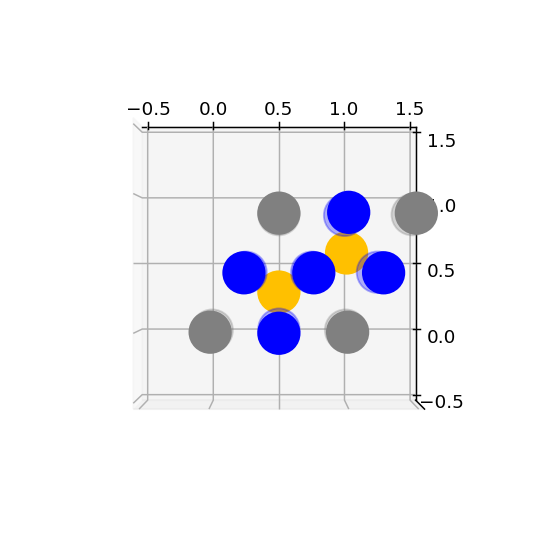

In [11]:
c_wht, c_blu, c_ylw = c_rhombus([0,0,0],Ratio_ca = np.sqrt((1+np.sqrt(3)/2)**2+0.5**2))

fig = plt.figure(figsize=(4,4))
fig.tight_layout()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect([2,2,1])
ax.view_init(elev=90, azim=-90)

ax.scatter(c_wht[:,0],c_wht[:,1],c_wht[:,2],
           marker='o',c='#808080',s=500)
ax.scatter(c_blu[:,0],c_blu[:,1],c_blu[:,2],
           marker='o',c='b',s=500)
ax.scatter(c_ylw[:,0],c_ylw[:,1],c_ylw[:,2],
           marker='o',c='#FFC000',s=500)

ax.set_zticks([])
ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_zlim(0,1)
plt.show()

In [12]:
filename_c_rhombus_dump = './c_FK_RH.dump'
bounds = np.array([[0,1.5],[0,np.sqrt(3)/2],[0,1]])
Create_dump(c_rhombus([0,0,0],Ratio_ca = np.sqrt((1+np.sqrt(3)/2)**2+0.5**2)),filename_c_rhombus_dump,boundary=bounds)